In [1]:
%matplotlib inline 
import sys, os
base_path = os.getcwd()[0:os.getcwd().rfind('WatermarkRobustness')] + "WatermarkRobustness/"
sys.path.append(base_path) 

import matplotlib.pyplot as plt
from src.usenix_main import usenix_blackbox
from src.models import get_deep_cnn_for_cifar, get_lenet_model_for_mnist
from src.preprocess_data import load_cifar_images, load_mnist_images
from src.util import plot_blackbox

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


# Description
In this notebook we are running a surrogate model attack. The attacker and owner data is disjoint.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
[1/4] USENIX Blackbox Attack: Loading CIFAR data
      Owner data: 100000 Attacker Data: 100000
     Found cached training data for owner_data100000100000
     Found cached training data for attacker_data100000100000
[2/4] Training the network with 35 keys each repeated 100 times)
Instructions for updating:
Use tf.cast instead.
      Skipping embedding of wm and use a cached entry instead
100000/100000 [==============================] - 77s 771us/step
    Done! Original models accuracy on attackers data: 0.80228
[3/4] Labeling the attackers data with the original model
[4/4] Training the surrogate model
Train on 100000 samples, validate on 10000 samples
Epoch 1/20
100000/100000 [==============================] - 319s 3ms/step - loss: 1.1999 - acc: 0.5965 - val_loss: 0.8837 - val_acc: 0.6929
=> Time: : 318.9320900440216
Confusion matrix, without normalization


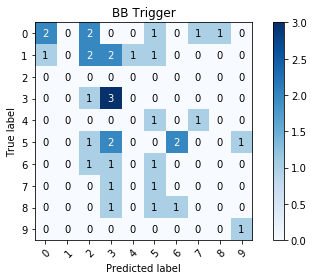

=> watermark_val: 0.17142857228006636
Epoch 2/20
100000/100000 [==============================] - 319s 3ms/step - loss: 0.7088 - acc: 0.7608 - val_loss: 0.7867 - val_acc: 0.7450
=> Time: : 318.5122809410095
Confusion matrix, without normalization


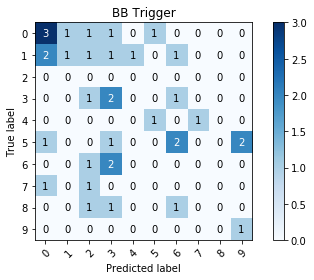

=> watermark_val: 0.2000000008514949
Epoch 3/20
100000/100000 [==============================] - 318s 3ms/step - loss: 0.6017 - acc: 0.8023 - val_loss: 0.7105 - val_acc: 0.7667
=> Time: : 318.28587436676025
Confusion matrix, without normalization


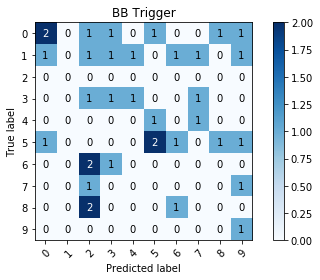

=> watermark_val: 0.17142857228006636
Epoch 4/20
100000/100000 [==============================] - 452s 5ms/step - loss: 0.5358 - acc: 0.8275 - val_loss: 0.6405 - val_acc: 0.7945
=> Time: : 451.83709144592285
Confusion matrix, without normalization


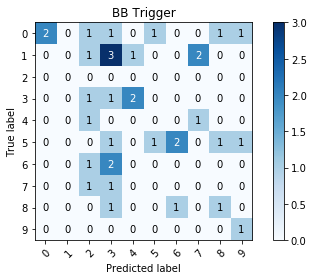

=> watermark_val: 0.17142857228006636
Epoch 5/20
100000/100000 [==============================] - 471s 5ms/step - loss: 0.4859 - acc: 0.8465 - val_loss: 0.7290 - val_acc: 0.7717
=> Time: : 470.59083223342896
Confusion matrix, without normalization


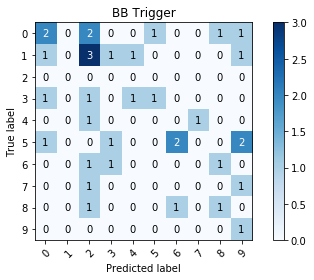

=> watermark_val: 0.11428571428571428
Epoch 6/20
100000/100000 [==============================] - 474s 5ms/step - loss: 0.4444 - acc: 0.8651 - val_loss: 0.6758 - val_acc: 0.7932
=> Time: : 473.6403090953827
Confusion matrix, without normalization


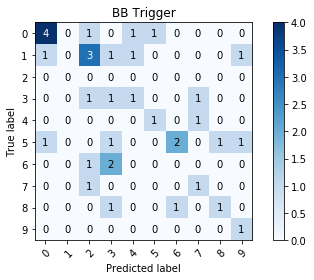

=> watermark_val: 0.2285714294229235
Epoch 7/20
100000/100000 [==============================] - 474s 5ms/step - loss: 0.4104 - acc: 0.8805 - val_loss: 0.6859 - val_acc: 0.7899
=> Time: : 473.56352519989014
Confusion matrix, without normalization


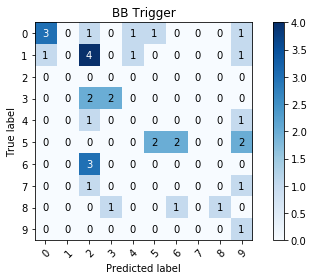

=> watermark_val: 0.25714285799435205
Epoch 8/20
100000/100000 [==============================] - 473s 5ms/step - loss: 0.3830 - acc: 0.8912 - val_loss: 0.6764 - val_acc: 0.7988
=> Time: : 473.4050691127777
Confusion matrix, without normalization


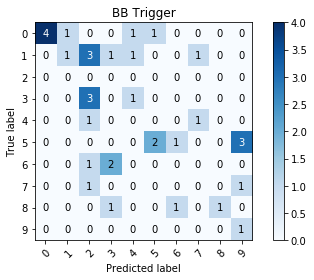

=> watermark_val: 0.2571428571428571
Epoch 9/20
100000/100000 [==============================] - 474s 5ms/step - loss: 0.3592 - acc: 0.9025 - val_loss: 0.6600 - val_acc: 0.8043
=> Time: : 473.9719090461731
Confusion matrix, without normalization


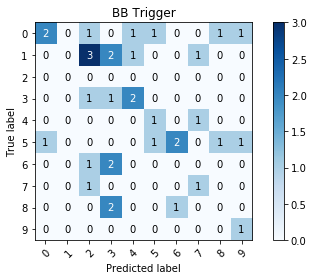

=> watermark_val: 0.17142857142857143
Epoch 10/20
100000/100000 [==============================] - 474s 5ms/step - loss: 0.3404 - acc: 0.9115 - val_loss: 0.7056 - val_acc: 0.7983
=> Time: : 473.74544286727905
Confusion matrix, without normalization


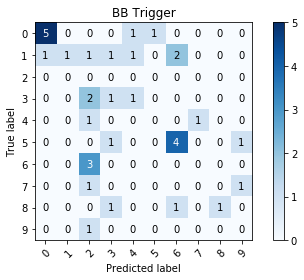

=> watermark_val: 0.2285714294229235
Epoch 11/20
100000/100000 [==============================] - 474s 5ms/step - loss: 0.3249 - acc: 0.9177 - val_loss: 0.6643 - val_acc: 0.7972
=> Time: : 473.82943892478943
Confusion matrix, without normalization


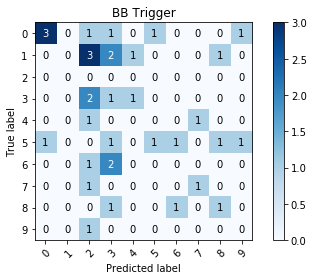

=> watermark_val: 0.2000000008514949
Epoch 12/20
 30720/100000 [========>.....................] - ETA: 5:20 - loss: 0.2977 - acc: 0.9325

In [ ]:
surr_model, all_history = usenix_blackbox(
     load_dataset_func=load_cifar_images,  # Which dataset to choose. Should return training and testing data
     dataset_label="CIFAR",  # Label of the dataset (for caching)
     model=get_deep_cnn_for_cifar(),  # Model specification for wm_embedding
     surrogate_model=get_deep_cnn_for_cifar(),
     owner_data_size=25000,
     total_owner_data_size=100000,
     key_length=35,
     wm_boost_factor=100,
     attacker_data_size=25000,
     total_attacker_data_size=100000,
     epochs_embed=20,
     epochs_surr=20,
     batchsize_surr=64,
     cache_embed_wm="usenix_cifar",
     cache_surr_model=None,
     verbose=True
)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_loss', 'watermark_val', 'time', 'time_total'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_loss', 'watermark_val', 'time', 'time_total'])
112.53630279302597
[5.632125353813171, 11.24327891667684, 16.855196686585746, 22.468163585662843, 28.08532891670863, 33.71212616761525, 39.38063156207402, 44.99853736956914, 50.621419902642565, 56.22641891638438, 61.83825152715047, 67.45425200462341, 73.09657286008199, 78.73441437482833, 84.37635431687038, 89.9857118288676, 95.60845399300257, 101.25943171977997, 106.88069815635681, 112.53630279302597, 117.85183762709299, 123.16037564277649, 128.46514021555583, 135.99575840632122, 143.83893894354503, 151.73294409513474, 159.6256695151329, 167.51575400034585, 175.4152858177821, 183.3110431989034, 191.20820051431656, 199.0975153128306, 206.9921778758367, 214.8719920873642, 222.74972889820734, 230.64629921118419, 238.54357020457587, 246.45001288255054, 254.34571835597353, 262.250

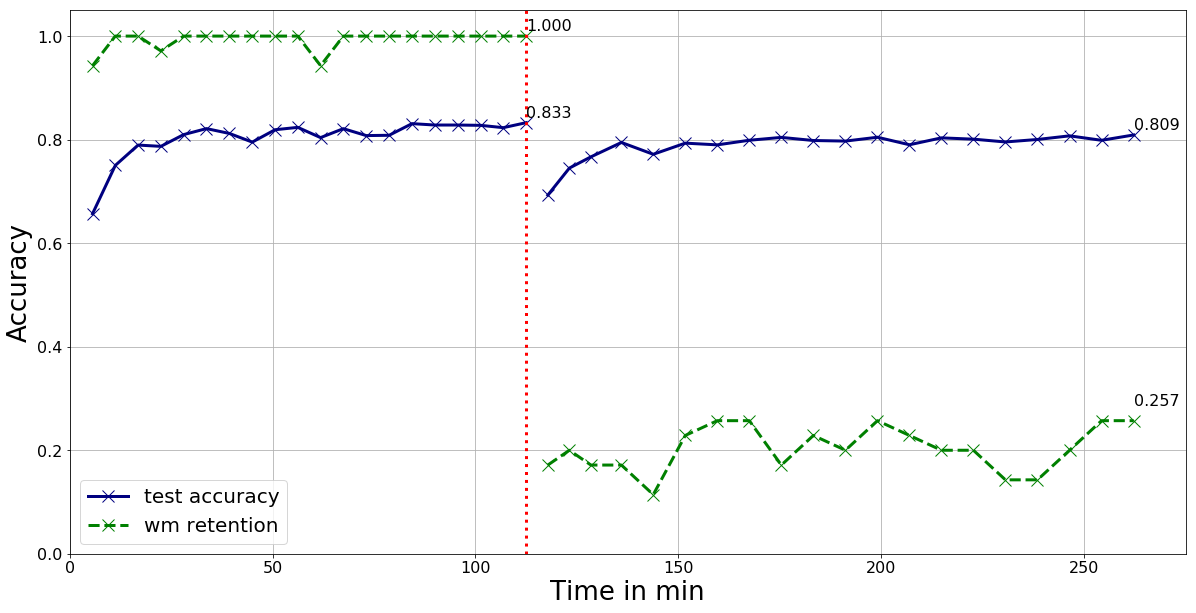

In [5]:
plot_blackbox(all_history)

In [ ]:
print(sum(all_history[0].history["time"])